In [2]:
import pandas as pd
import pyodbc 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import pyodbc
import warnings 
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from pandas.plotting import scatter_matrix 
from matplotlib import pyplot 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import confusion_matrix 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import log_loss
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.externals import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score

In [3]:
conn = pyodbc.connect('DSN=PythonConnector;UID=Galaxy;PWD=Galaxy@123')
df = pd.read_sql_query('select * from [AIDA].[dbo].[Refreshed_Churn_Data_Test_Train_2]', conn)

In [4]:
df_nca = df.copy()

In [5]:
df_nca.describe()

,savings_account_count,current_account_count,loan_account_count,debit_cards_count,credit_cards_count,ibank_count,obank_count,pos_count,total_products_count,customer_age,...,ibank_complaints,obank_complaints,atm_complaints,cards_complaints,pos_complaints,total_complaints,failed_ibank_tx,failed_obank_tx,failed_total_tx,churned
count,1.999781e+06,1.999781e+06,1.999781e+06,1.999781e+06,1.999781e+06,1.999781e+06,1.999781e+06,1.999781e+06,1.999781e+06,1.999781e+06,...,1.999781e+06,1.999781e+06,1.999781e+06,1.999781e+06,1.999781e+06,1.999781e+06,1.999781e+06,1.999781e+06,1.999781e+06,1.999781e+06
mean,9.537074e-01,9.324871e-02,6.728237e-03,5.817282e-01,3.695405e-04,4.641093e-01,1.918880e-01,3.185349e-04,2.292098e+00,3.517359e+01,...,1.461560e-02,6.711735e-03,7.075775e-04,9.634555e-03,7.020769e-04,4.459088e-02,2.696455e-01,6.746539e-02,3.378470e-02,5.000418e-01
std,2.729816e-01,3.287081e-01,9.720738e-02,8.441441e-01,1.921989e-02,5.648909e-01,4.630698e-01,1.809515e-02,1.567406e+00,1.240706e+01,...,1.725418e-01,1.205884e-01,3.367676e-02,1.396382e-01,2.895858e-02,3.740806e-01,1.425904e+00,9.093909e-01,7.426422e-01,5.000001e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.700000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,3.300000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,4.200000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,1.700000e+01,1.200000e+01,2.100000e+01,2.700000e+01,1.000000e+00,1.300000e+01,1.300000e+01,3.000000e+00,4.700000e+01,1.180000e+02,...,2.200000e+01,3.200000e+01,7.000000e+00,1.700000e+01,7.000000e+00,3.800000e+01,9.300000e+01,2.300000e+02,2.320000e+02,1.000000e+00


In [6]:
df.columns

Index(['customer_ID', 'savings_account_count', 'current_account_count',
       'loan_account_count', 'debit_cards_count', 'credit_cards_count',
       'ibank_count', 'obank_count', 'pos_count', 'total_products_count',
       'customer_age', 'customer_age_band', 'account_age',
       'cummulative_credit', 'cummulative_debit', 'avg_ledger_balance',
       'average_monthly_inflow', 'average_monthly_outflow', 'ibank_tx_count',
       'obank_tx_count', 'atm_tx_count', 'branch_tx_count', 'pos_web_tx_count',
       'ibank_complaints', 'obank_complaints', 'atm_complaints',
       'cards_complaints', 'pos_complaints', 'total_complaints',
       'failed_ibank_tx', 'failed_obank_tx', 'failed_total_tx',
       'customer_location', 'customer_status', 'churned'],
      dtype='object')

In [7]:
cat_var =df_nca[['customer_ID','customer_location', 'customer_status', 'customer_age_band']]

In [8]:
cat_var.head()

,customer_ID,customer_location,customer_status,customer_age_band
0,R01620889,LAGOS CITY,Active,21+
1,R00905917,LAGOS CITY,Active,31+
2,R03142499,PORT HARCOURT,Active,31+
3,R02807716,PORT HARCOURT,Active,26+
4,R03401220,FINACLE10 MIGRATION,Active,21+


In [9]:
df_nca.drop(cat_var,axis =1, inplace =True)

In [10]:
df_nca.head()

,savings_account_count,current_account_count,loan_account_count,debit_cards_count,credit_cards_count,ibank_count,obank_count,pos_count,total_products_count,customer_age,...,ibank_complaints,obank_complaints,atm_complaints,cards_complaints,pos_complaints,total_complaints,failed_ibank_tx,failed_obank_tx,failed_total_tx,churned
0,1,0,0,1,0,1,0,0,3,25,...,1,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,1,34,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,3,0,2,0,0,7,38,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,1,0,0,3,30,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,2,25,...,0,0,0,0,0,0,3,0,0,0


In [11]:
skew = df_nca.skew() 
print(skew)

savings_account_count        -0.320768
current_account_count         4.612689
loan_account_count           26.921254
debit_cards_count             2.620565
credit_cards_count           51.991038
ibank_count                   1.157544
obank_count                   3.224270
pos_count                    58.772492
total_products_count          2.504097
customer_age                  0.672814
account_age                   0.775149
cummulative_credit          141.286310
cummulative_debit           142.979175
avg_ledger_balance         1059.275315
average_monthly_inflow      441.123326
average_monthly_outflow     580.536838
ibank_tx_count                8.327858
obank_tx_count               93.809579
atm_tx_count                  7.063098
branch_tx_count              11.514594
pos_web_tx_count            174.824805
ibank_complaints             19.968715
obank_complaints             40.871479
atm_complaints               67.167679
cards_complaints             24.177621
pos_complaints           

In [12]:
#Handling positive skew
# data_ncv['average_monthly_inflow'] = np.log(data_ncv['average_monthly_inflow'])
# data_ncv['credit_turnover'] = np.log(data_ncv['credit_turnover'])
# data_ncv['debit_turnover'] = np.log(data_ncv['debit_turnover'])
# data_ncv['loan_account_count'] = np.log(data_ncv['loan_account_count'])
# data_ncv['credit_cards_count'] = np.log(data_ncv['credit_cards_count'])
# data_ncv['pos_count'] = np.log(data_ncv['pos_count'])
# data_ncv['average_credit'] = np.log(data_ncv['average_credit'])

In [13]:
df_nca.isnull().sum()

savings_account_count       0
current_account_count       0
loan_account_count          0
debit_cards_count           0
credit_cards_count          0
ibank_count                 0
obank_count                 0
pos_count                   0
total_products_count        0
customer_age                0
account_age                 0
cummulative_credit          0
cummulative_debit          20
avg_ledger_balance          0
average_monthly_inflow      0
average_monthly_outflow     0
ibank_tx_count              0
obank_tx_count              0
atm_tx_count                0
branch_tx_count             0
pos_web_tx_count            0
ibank_complaints            0
obank_complaints            0
atm_complaints              0
cards_complaints            0
pos_complaints              0
total_complaints            0
failed_ibank_tx             0
failed_obank_tx             0
failed_total_tx             0
churned                     0
dtype: int64

In [14]:
df_nca['cummulative_debit'].fillna(0, inplace = True)

In [15]:
df_nca.head(2000000000)

,savings_account_count,current_account_count,loan_account_count,debit_cards_count,credit_cards_count,ibank_count,obank_count,pos_count,total_products_count,customer_age,...,ibank_complaints,obank_complaints,atm_complaints,cards_complaints,pos_complaints,total_complaints,failed_ibank_tx,failed_obank_tx,failed_total_tx,churned
0,1,0,0,1,0,1,0,0,3,25,...,1,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,1,34,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,3,0,2,0,0,7,38,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,1,0,0,3,30,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,2,25,...,0,0,0,0,0,0,3,0,0,0
5,1,0,0,1,0,1,0,0,3,37,...,0,0,0,0,0,0,4,0,0,0
6,1,0,0,0,0,0,0,0,1,2,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,1,0,0,2,43,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,1,0,1,0,0,3,50,...,0,0,0,0,0,0,4,0,0,0
9,1,0,0,0,0,1,1,0,3,22,...,0,0,0,0,0,0,15,0,0,0


In [16]:
df_nca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999781 entries, 0 to 1999780
Data columns (total 31 columns):
savings_account_count      int64
current_account_count      int64
loan_account_count         int64
debit_cards_count          int64
credit_cards_count         int64
ibank_count                int64
obank_count                int64
pos_count                  int64
total_products_count       int64
customer_age               int64
account_age                int64
cummulative_credit         float64
cummulative_debit          float64
avg_ledger_balance         float64
average_monthly_inflow     float64
average_monthly_outflow    float64
ibank_tx_count             int64
obank_tx_count             int64
atm_tx_count               int64
branch_tx_count            int64
pos_web_tx_count           int64
ibank_complaints           int64
obank_complaints           int64
atm_complaints             int64
cards_complaints           int64
pos_complaints             int64
total_complaints   

In [17]:
#randomizing dataframe
df_nca = df_nca.sample(frac=1, axis=0).reset_index(drop=True)
df_nca.head(1)

,savings_account_count,current_account_count,loan_account_count,debit_cards_count,credit_cards_count,ibank_count,obank_count,pos_count,total_products_count,customer_age,...,ibank_complaints,obank_complaints,atm_complaints,cards_complaints,pos_complaints,total_complaints,failed_ibank_tx,failed_obank_tx,failed_total_tx,churned
0,1,1,0,2,0,2,2,0,8,53,...,0,0,0,0,0,1,1,0,0,0


In [18]:
#import pandas as pd

#def clean_dataset(df_nca):
 #   assert isinstance(df_nca, pd.DataFrame), "df needs to be a pd.DataFrame"
  #df_nca.dropna(inplace=True)
  #  indices_to_keep = ~df_nca.isin([np.nan, np.inf, -np.inf]).any(1)
   # return df_nca[indices_to_keep].astype(np.float64)
#df_nca

In [19]:
 features = df_nca.reindex(columns=['savings_account_count','current_account_count','loan_account_count', 'debit_cards_count', 
                    'credit_cards_count', 'ibank_count', 'obank_count','pos_count',
                    'total_products_count','customer_age','account_age', 'cummulative_credit','cummulative_debit',
                    'average_ledger_balance','average_monthly_inflow', 'average_monthly_outflow',
                    'ibank_tx_count', 'obank_tx_count','atm_tx_count','branch_tx_count','pos_web_tx_count','ibank_complaints',
                    'obank_complaints','atm_complaint','cards_complaints','pos_complaints', 'total_complaints', 'failed_ibank_tx',
       'failed_obank_tx', 'failed_total_tx', 'churned'])

X = features.values
X[:,5]

array([2., 0., 0., ..., 0., 0., 1.])

In [20]:
X = np.nan_to_num(X)

In [21]:
y = df_nca['churned'].values
X.shape,y.shape

((1999781, 31), (1999781,))

In [22]:
#normalizing the dataset
X= preprocessing.StandardScaler().fit(X).transform(X)
X

array([[ 0.16958135,  2.75853109, -0.0692153 , ..., -0.07418746,
        -0.04549258, -1.00008351],
       [ 0.16958135, -0.28368249, -0.0692153 , ..., -0.07418746,
        -0.04549258,  0.99991649],
       [ 0.16958135, -0.28368249, -0.0692153 , ..., -0.07418746,
        -0.04549258, -1.00008351],
       ...,
       [ 0.16958135, -0.28368249, -0.0692153 , ..., -0.07418746,
        -0.04549258,  0.99991649],
       [ 0.16958135, -0.28368249, -0.0692153 , ..., -0.07418746,
        -0.04549258,  0.99991649],
       [ 0.16958135, -0.28368249, -0.0692153 , ..., -0.07418746,
        -0.04549258, -1.00008351]])

In [23]:
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.3,random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (1399846, 31) (1399846,)
Test set: (599935, 31) (599935,)


# USING LOGISTIC REGRESSION ALGORITHM

In [25]:
lr_best_solver=''
lr_best_reg_strength=0
lr_jaccard_best_score=0
#mean_acc = np.zeros((14))
#counter=0
solver_list=('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga')
for solver_model in solver_list:
    for reg_strength in (0.01, 0.001, 0.0001):
        LR = LogisticRegression(C=reg_strength, solver=solver_model).fit(x_train,y_train)
        LRpred = LR.predict(x_test)
        lr_jaccard_score = jaccard_similarity_score(y_test, LRpred)
#        print("Solver model:", solver_model, "with Regularization Strength:", reg_strength, "has a probability of: ",lr_jaccard_score)
        if lr_jaccard_score > lr_jaccard_best_score:
            lr_jaccard_best_score = lr_jaccard_score
            lr_best_solver = solver_model
            lr_best_reg_strength = reg_strength
        
print("The solver with best value in LR model is:", lr_best_solver, " having a strength of ", lr_best_reg_strength, " with Jaccard Similarity Score:", lr_jaccard_best_score)
LRmodel = LogisticRegression(C=lr_best_reg_strength, solver=lr_best_solver).fit(x_train,y_train)
LRpredict = LR.predict(x_test)
LRpredict_prob = LR.predict_proba(x_test)

C:\Users\P7576\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\P7576\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\P7576\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


The solver with best value in LR model is: newton-cg  having a strength of  0.01  with Jaccard Similarity Score: 0.9999933326110328


In [26]:
#Plotting the confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    299126
          1       1.00      1.00      1.00    300809

avg / total       1.00      1.00      1.00    599935

Confusion matrix, without normalization
[[299126      0]
 [   124 300685]]


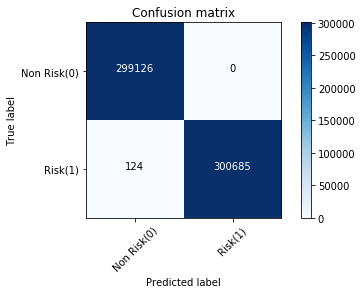

In [27]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, LRpredict)
np.set_printoptions(precision=2)

print (classification_report(y_test, LRpredict))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Non Risk(0)', 'Risk(1)'],normalize= False,  title='Confusion matrix')

In [28]:
#Saving the model to a pickel file to load when needed
joblib.dump(LogisticRegression, 'Fidelity_Churn_Model_V1.pkl')
# To load: model = joblib.load('rf_regressor.pkl')

['Fidelity_Churn_Model_V1.pkl']

# USING KNN ALGORITHM

In [ ]:
best_k = 1
best_accuracy = 0
for k in range(1,100,1):
    knnmodel = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
    knnpred = knnmodel.predict(x_test)
    accuracy = accuracy_score(y_test, knnpred)
    if accuracy > best_accuracy:
        best_k = k
        best_accuracy = accuracy
print("The best accuracy is with k=",best_k, "and the accuracy is %3.2f" %(best_accuracy))

knnmodel = KNeighborsClassifier(n_neighbors = best_k).fit(x_train,y_train)
knnpred = knnmodel.predict(x_test)
knnpred_prob = knnmodel.predict_proba(x_test)
#accuracy = accuracy_score(y_test, knnpred)
#print("the accuracy is %3.2f" %(accuracy))

In [ ]:
np.unique(knnpred)

In [ ]:
#Plotting the confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, knnpred)
np.set_printoptions(precision=2)

print (classification_report(y_test, knnpred))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Non Risk(0)', 'Risk(1)'],normalize= False,  title='Confusion matrix')

In [ ]:
#Saving the model to a pickel file to load when needed
joblib.dump(knnmodel, 'Fidelity_Churn_Model_V1.pkl')
# To load: model = joblib.load('rf_regressor.pkl')

# VALIDATING THE KNN MODEL AGAINST UNSEEN DATASET

In [ ]:
#Validation
validation = pd.read_sql_query('select * from [AIDA].[dbo].[Refreshed_Credit_Scoring_Data_test]', conn)

In [ ]:
validation.head()

In [ ]:
validation.shape

In [ ]:
validation_cat_var =validation[['customer_ID','account_no','gender','city_name','customer_age_band',
                   'balance_band','schm_type','turnover_band','total_product_count']]

In [ ]:
validation.drop(validation_cat_var,axis =1, inplace =True)

In [ ]:
validation.isnull().sum()

In [ ]:
validation['account_age'].fillna(0, inplace = True)
validation.isnull().sum()
# df[1].fillna(0, inplace=True)
# validation['account_age'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

In [ ]:
validation_features = validation[['customer_age','account_age', 'average_ledger_balance','average_monthly_inflow', 'average_monthly_outflow','credit_turnover', 'debit_turnover','savings_account_count', 'current_account_count', 'loan_account_count',
       'debit_cards_count', 'credit_cards_count', 'ibank_count', 'obank_count',
       'pos_count', 'average_credit']]
X_validation = validation_features.values
y_validation = validation['credit_score'].values

In [ ]:
X_validation= preprocessing.StandardScaler().fit(X_validation).transform(X_validation)
X_validation

In [ ]:
x_val_train,x_val_test, y_val_train,y_val_test = train_test_split(X_validation,y_validation,test_size=0.2,random_state=4)

In [ ]:
knn_val_pred = knnmodel.predict(x_val_test)
accuracy = accuracy_score(y_val_test, knn_val_pred)
print(accuracy)

In [ ]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_val_test, knn_val_pred)
np.set_printoptions(precision=2)

print (classification_report(y_val_test, knn_val_pred))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Non Risk(0)', 'Risk(1)'],normalize= False,  title='Confusion matrix')

In [ ]:
#Saving the model to a pickel file to load when needed
joblib.dump(knnmodel, 'Fidelity_Churn_Model_V1.pkl')
# To load: model = joblib.load('rf_regressor.pkl')

# USING SUPPORT VECTOR MACHINE

In [ ]:
svm_best_kernel=''
svm_jaccard_best_score=0
for model_svm_kernel in ('linear', 'poly', 'rbf', 'sigmoid'):
    model_svm = SVC(kernel=model_svm_kernel, gamma='auto', probability=True)
    model_svm.fit(x_train, y_train)
    predict_svm = model_svm.predict(x_test)
    svm_jaccard_score=jaccard_similarity_score(y_test, predict_svm)
    print("SVM Model:", model_svm_kernel, "jaccard similarity score: %3.2f" %(svm_jaccard_score))
    if svm_jaccard_score > svm_jaccard_best_score:
        svm_jaccard_best_score = svm_jaccard_score
        svm_best_kernel = model_svm_kernel

print("\n\nThe kernel with best value in SVM model is:", svm_best_kernel, " with Jaccard Similarity Score: %3.2f" %(svm_jaccard_best_score))

model_svm = SVC(kernel=svm_best_kernel, gamma='auto', probability=True)
model_svm.fit(x_train, y_train)
predict_svm = model_svm.predict(x_test)
SVM_predprob = model_svm.predict_proba(x_test)


jaccard_SVM_traintest=jaccard_similarity_score(y_test, predict_svm)
f1_score_SVM_traintest=f1_score(y_test, predict_svm, average='weighted', labels=np.unique(predict_svm))
log_loss_SVM_traintest = log_loss(y_test, SVM_predprob)

print("The Jaccard Similarity Score for train+test data is : %3.2f" %(jaccard_SVM_traintest))
print("The f1 Score for train+test data is : %3.2f" %(f1_score_SVM_traintest))
print("The log loss for train+test data is : %3.2f" %(log_loss_SVM_traintest))

print("\n\nClassification Report:")
print (classification_report(y_test, predict_svm, labels=np.unique(predict_svm)))

# USING RANDOM FOREST ALGORITHM

In [ ]:
model = RandomForestRegressor(n_estimators=100)
 
#hyperparameters = { 'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
                  #'randomforestregressor__max_depth': [None, 5, 3, 1]}
 
#model = GridSearchCV(RF, hyperparameters, cv=10)
 
model.fit(x_train, y_train)
 
# 8. Refit on the entire training set
# No additional code needed if clf.refit == True (default is True)
 
# 9. Evaluate model pipeline on test data
pred = model.predict(x_test)
print('r2_score = ',round(r2_score(y_test, pred),2))
print('mean_squared_error = ',round(mean_squared_error(y_test, pred),3))
 

In [ ]:
# search for a value in a dataframe

# newcopy.loc[newcopy.customer_ID =='R03218079'][['customer_ID', 'gender', 'city_name', 'customer_age',
#        'customer_age_band', 'account_age', 'average_ledger_balance',
#        'balance_band', 'average_monthly_inflow', 'average_monthly_outflow',
#        'schm_type', 'credit_turnover', 'debit_turnover', 'turnover_band',
#        'savings_account_count', 'current_account_count', 'loan_account_count',
#        'debit_cards_count', 'credit_cards_count', 'ibank_count', 'obank_count',
#        'pos_count', 'total_product_count', 'average_credit', 'credit_score',
#        'Unnamed: 25']]